## Import Required Packages

In [1]:
# # install nanum font
import  matplotlib.font_manager  as fm
import  matplotlib.pyplot  as plt

plt.rc("font", family= 'Nanum Gothic')
plt.rcParams['axes.unicode_minus'] = False
font_path = "../fonts/NanumGothic.ttf"

bash
- pip3 install konlpy: 한국어 처리를 위한 python library
- pip3 install nltk: 자연어 처리를 위한 python library (tokenize, pos-tagging, parser 등 제공)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from wordcloud import WordCloud

import re
from konlpy.tag import Komoran
import numpy as np
from collections import Counter

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer
from transformers import BertTokenizer, BertModel
from sklearn.feature_extraction.text import TfidfVectorizer
import torch

[nltk_data] Downloading package punkt to /Users/minair/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/minair/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/minair/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/minair/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/opt/anaconda3/envs/minair/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data Load

In [3]:
path = "../data/notice.csv"

df = pd.read_csv(path)

In [4]:
df.head()

,title,label
0,재학생 영어진단평가 신청 및 일정 안내,0
1,울산대학교 2019년도 2학기 국내교환대학 학점교류 수학 안내 만료,0
2,2019학년도 여름계절제 학부 강의정보 공유를 위한 설문 실시 안내 만료,0
3,울산과학기술원 2019학년도 2학기 국내대학 학점교류 수학 안내 만료,0
4,한국과학기술원 2019학년도 2학기 국내교환 학점교류 수학 안내 만료,0


In [5]:
#label 값에 null값 확인
df['label'].isnull().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9782 entries, 0 to 9781
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9782 non-null   object
 1   label   9782 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 153.0+ KB


## EDA

### 1. 결측치 확인+중복제거

In [7]:
df[df.duplicated()]

,title,label
101,2019학년도 겨울 계절제수업 폐강 과목 안내(1차),0
147,학사경고자 학사지도 안내,0
267,졸업앨범 미촬영자 앨범비 환불신청 안내(신촌캠 학부생),0
279,학생 상해보험 제도 안내,0
379,졸업앨범 미촬영자 앨범비 환불신청 안내(신촌캠 학부생),0
...,...,...
9707,생활관(우정원) 기숙사 조교 모집,0
9713,국제처 (국제)글로벌교육지원팀 계약직 채용 공고,1
9715,입학처 2023-1학기 하계방학 근로학생 모집 ★,0
9734,★국제C 재무회계팀 기간제 근로자 채용 공고★,1


In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df

,title,label
0,재학생 영어진단평가 신청 및 일정 안내,0
1,울산대학교 2019년도 2학기 국내교환대학 학점교류 수학 안내 만료,0
2,2019학년도 여름계절제 학부 강의정보 공유를 위한 설문 실시 안내 만료,0
3,울산과학기술원 2019학년도 2학기 국내대학 학점교류 수학 안내 만료,0
4,한국과학기술원 2019학년도 2학기 국내교환 학점교류 수학 안내 만료,0
...,...,...
9777,"[추천채용] [김.장 법률사무소] 비서,빌링 정규직 추천채용 안내",1
9778,예술디자인대학 시각디자인학과 조교 채용 공고,0
9779,재무회계팀(국제) 근로학생 모집합니다.,0
9780,생활관(제2기숙사)기숙사 조교 모집 안내,0


### 2. class의 균형성 확인

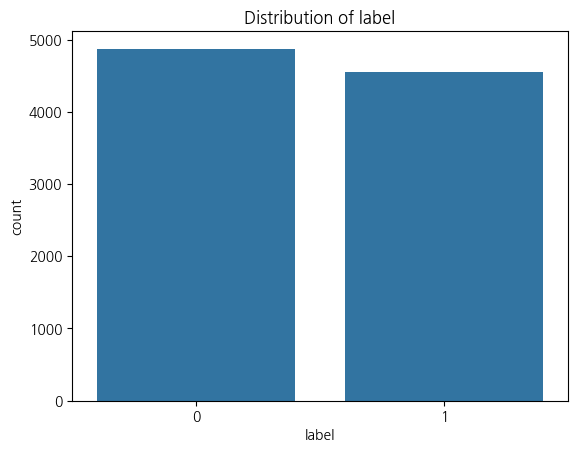

In [10]:
#label 분포 확인
sns.countplot(x='label', data=df)
plt.title('Distribution of label')
plt.show()

In [11]:
df['label'].value_counts()

label
0    4873
1    4550
Name: count, dtype: int64

### 3. title length 분포 파악

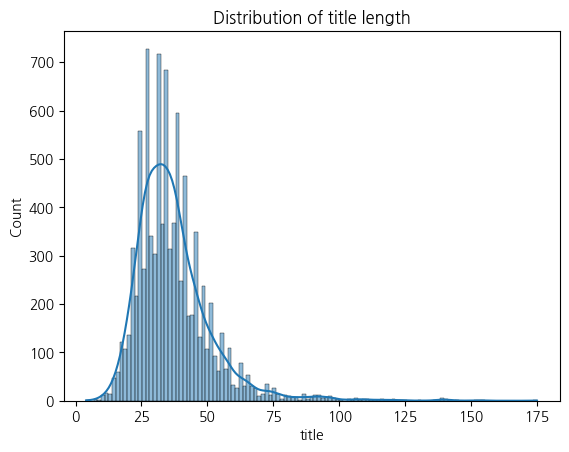

In [12]:
#title에 대한 eda

sns.histplot(df['title'].str.len(), kde=True)
plt.title('Distribution of title length')
plt.show()

In [13]:
df['title'].str.len().median()

np.float64(35.0)

In [14]:
df[df["label"] == 0]['title'].str.len().median()

np.float64(34.0)

In [15]:
df[df["label"] == 1]['title'].str.len().median()

np.float64(35.0)

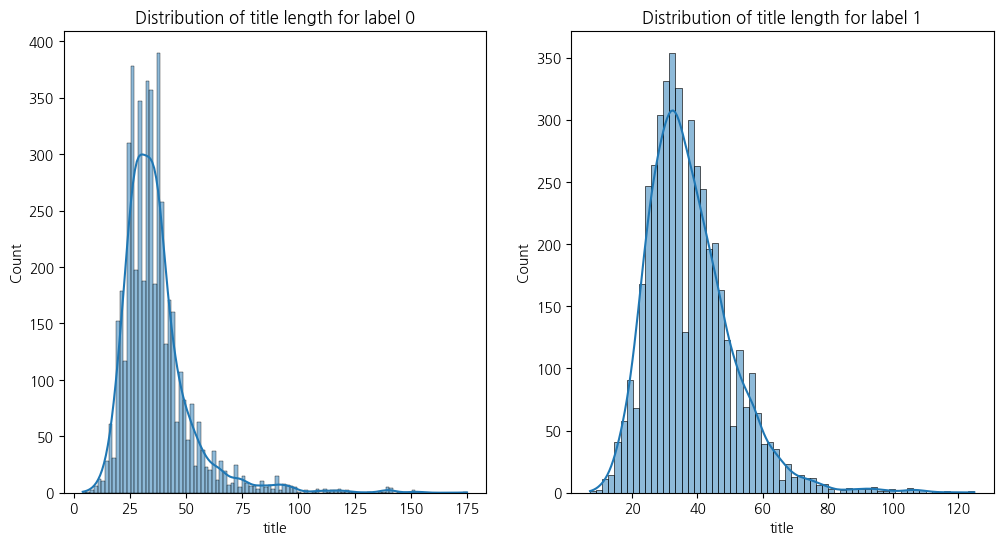

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#label= 0일 때의 텍스트 길이 분포
sns.histplot(df[df['label'] == 0]['title'].str.len(), kde=True, ax = ax[0])
ax[0].set_title('Distribution of title length for label 0')

#label= 1일 때의 텍스트 길이 분포
sns.histplot(df[df['label'] == 1]['title'].str.len(), kde=True, ax = ax[1])
ax[1].set_title('Distribution of title length for label 1')

plt.show()

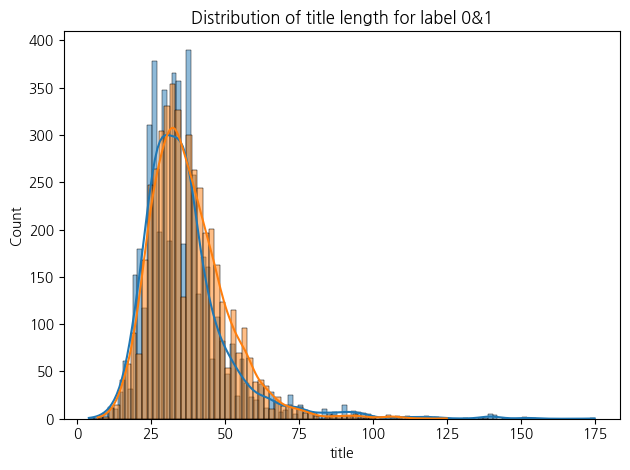

In [17]:
#label= 0일 때의 텍스트 길이 분포 (blue)
sns.histplot(df[df['label'] == 0]['title'].str.len(), kde=True)


#label= 1일 때의 텍스트 길이 분포 (orange)
sns.histplot(df[df['label'] == 1]['title'].str.len(), kde=True)
plt.title('Distribution of title length for label 0&1')

plt.tight_layout()
plt.show()

### 4. word cloud (불용어 제거 x ver)

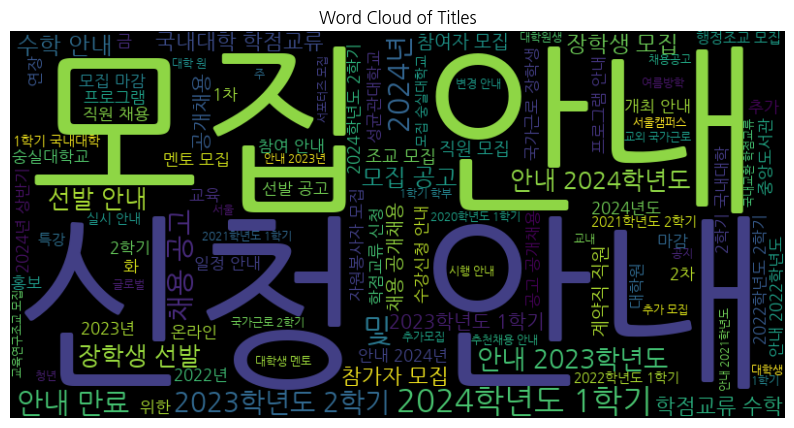

In [18]:
#데이터셋 전체 word cloud

all_words = ' '.join([text for text in df['title']])
wordcloud = WordCloud(font_path = font_path, width=800, height=400, max_words=100).generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles')
plt.show()


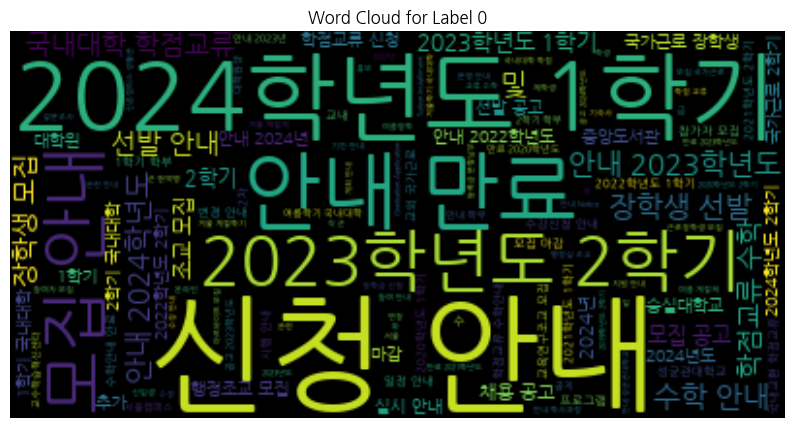

In [19]:
#label = 0 의 word cloud
text_label_0 = ' '.join(df[df['label'] == 0]['title'].astype(str))
wordcloud_label_0 = WordCloud(font_path=font_path, background_color='black').generate(text_label_0)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_label_0, interpolation='bilinear')
plt.title('Word Cloud for Label 0')
plt.axis('off')

plt.show()

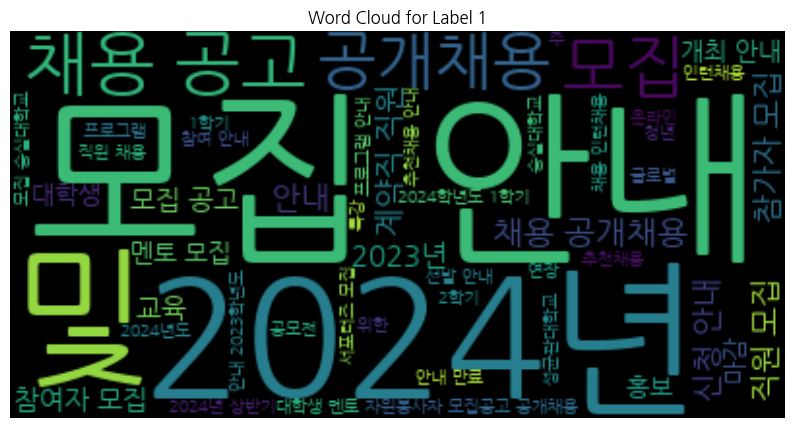

In [20]:
#label = 1 의 word cloud
text_label_1 = ' '.join(df[df['label'] == 1]['title'].astype(str))
wordcloud_label_1 = WordCloud(font_path=font_path, background_color='black').generate(text_label_1)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_label_1, interpolation='bilinear')
plt.title('Word Cloud for Label 1')
plt.axis('off')

plt.show()

## Preprocessing

In [23]:
#영문자와 한글만 title에 남기기

df['title'] = df['title'].str.replace('[^a-z|A-Z|ㄱ-ㅎ|가-힣|]', ' ', regex = True)

In [24]:
df['title']

0                         재학생 영어진단평가 신청 및 일정 안내 
1          울산대학교     년도  학기 국내교환대학 학점교류 수학 안내 만료
2           학년도 여름계절제 학부 강의정보 공유를 위한 설문 실시 안내 만료
3        울산과학기술원     학년도  학기 국내대학 학점교류 수학 안내 만료 
4        한국과학기술원     학년도  학기 국내교환 학점교류 수학 안내 만료 
                          ...                   
9777         추천채용   김 장 법률사무소  비서 빌링 정규직 추천채용 안내
9778                    예술디자인대학 시각디자인학과 조교 채용 공고
9779                       재무회계팀 국제  근로학생 모집합니다 
9780                      생활관 제 기숙사 기숙사 조교 모집 안내
9781       국가근로     학기 칠보청소년문화의집 교외  국가근로 장학생 모집
Name: title, Length: 9423, dtype: object

In [25]:
# 영어 알파벳 (대소문자)를 인식
eng = re.compile(r'[a-zA-Z]')

In [26]:
# lambda 함수를 사용해서 text의 탐지된 x(영어)를 lowercase로 바꿔준다.
def lowercase(text):
    return re.sub(r'[a-zA-Z]', lambda x: x.group().lower(), text)

In [27]:
df['title'] = df['title'].apply(lowercase)

In [28]:
# 크롤링해온 학교 명을 95% 정도 삭제하고, 5% 정도는 남겨두고자 함.
# 제거할 단어와 확률

school_words = ['신촌', '이화여자대학교', '이대', '이화여대' '이화', '이화인','성균관대학교', '성대',
              '성균', '성균인', '홍익대학교', '홍대', '홍익', '홍익인', '숭실대학교', '숭실대',
              '숭실', '숭실인', '연세대학교', '연대', '연세', '연세인', '경희', '경희대', '서강']

probability = 0.95

# 단어 제거 함수
def probabilistic_remove(word, text, probability):
    if np.random.rand() < probability:
        return text.replace(word, '')
    return text

# 각 행에 대해 school words를 95% 확률로 제거
for school_word in school_words:
    df['title'] = df['title'].apply(lambda x: probabilistic_remove(school_word, x, probability))


In [29]:
# 형태소 분석 및 불용어 제거 함수

def preprocess(text):
    stop_words = ['의','가','이','은','들','는','걍','과','들','과','으로','도','을',
                 '를','으로','자','에','와','한','하다','에서','에게', '및', '연도', '년',
                 '년도', '학기', 'ㄴ' '학년도', '회', '상반기', '하반기', '년대', '학년',
                 '오후', '오전', '오늘', '내일', '회차', '개월', '주년', '종료', 'th', 'st', 'nd', "'s", '접수', '기한', '연장',
                  '월', '어', '다', '까지', '제', '등', '등등', '몇', '면', '각', '각각', '마감','공통', '만료',
                  '여', '대', '백양']

    komoran = Komoran(userdic = 'user_dictionary.txt') # user_dictionary를 설정해 사용자가 단어를 정의
    lemmatizer = WordNetLemmatizer() # 영어 표제화: 단어를 기본형으로 변환

    token_list = []

    for sentence in text :
       sentence = sentence.strip()
       if not sentence:
           token_list.append('')
           continue

       words = sentence.split()
       sentense_list = []

       for word in words :
          if eng.match(word) :
              tokens_word = word_tokenize(word)
              tokens_pos = pos_tag(tokens_word)
              for w, pos in tokens_pos:
                  if pos.startswith('N'): # 명사
                      lemma = lemmatizer.lemmatize(w, pos='n') # 기본형으로 변환
                  elif pos.startswith('V'): # 동사
                      lemma = lemmatizer.lemmatize(w, pos='v') # 기본형으로 변환
                  elif pos.startswith('J'): # 형용사
                      lemma = lemmatizer.lemmatize(w, pos='a') # 기본형으로 변환
                  elif pos.startswith('R'): # 부사
                      lemma = lemmatizer.lemmatize(w, pos='r') # 기본형으로 변환
                  else :
                      continue
                  sentense_list.append(lemma)

          else : # 한국어인 경우
              nouns = komoran.nouns(word)
              sentense_list.extend(nouns)
       token = [t for t in sentense_list if t not in stop_words]
       token_list.append(' '.join(token))
    return token_list

In [30]:
df['processed_title'] = preprocess(df['title'])

In [31]:
df

,title,label,processed_title
0,재학생 영어진단평가 신청 및 일정 안내,0,재학생 영어 진단 평가 신청 일정 안내
1,울산대학교 년도 학기 국내교환대학 학점교류 수학 안내 만료,0,울산대학교 국내 교환 대학 학점 교류 수학 안내
2,학년도 여름계절제 학부 강의정보 공유를 위한 설문 실시 안내 만료,0,여름 계절제 학부 강의 정보 공유 설문 실시 안내
3,울산과학기술원 학년도 학기 국내대학 학점교류 수학 안내 만료,0,울산과학기술원 국내 대학 학점 교류 수학 안내
4,한국과학기술원 학년도 학기 국내교환 학점교류 수학 안내 만료,0,한국 과학기술원 국내 교환 학점 교류 수학 안내
...,...,...,...
9777,추천채용 김 장 법률사무소 비서 빌링 정규직 추천채용 안내,1,추천 채용 김 장 법률 사무소 비서 빌 링 정규직 추천 채용 안내
9778,예술디자인대학 시각디자인학과 조교 채용 공고,0,예술 디자인 대학 시각 디자인 학과 조교 채용 공고
9779,재무회계팀 국제 근로학생 모집합니다,0,재무회계 팀 국제 근로 학생 모집
9780,생활관 제 기숙사 기숙사 조교 모집 안내,0,생활관 기숙사 기숙사 조교 모집 안내


In [32]:
df.to_csv("preprocessed_title.csv")

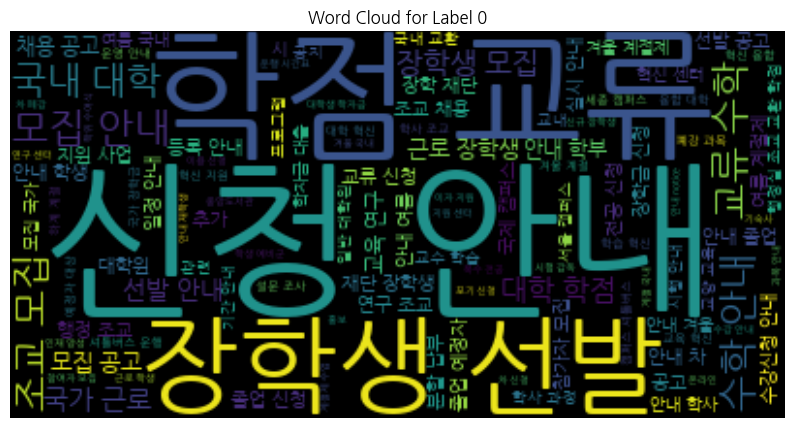

In [33]:
#label = 0 의 word cloud
text_label_0 = ' '.join(df[df['label'] == 0]['processed_title'].astype(str))
wordcloud_label_0 = WordCloud(font_path=font_path, background_color='black').generate(text_label_0)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_label_0, interpolation='bilinear')
plt.title('Word Cloud for Label 0')
plt.axis('off')

plt.show()

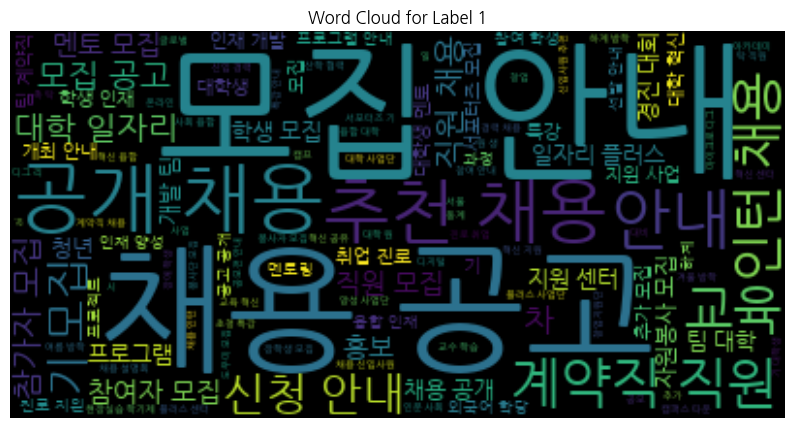

In [34]:
#label = 1 의 word cloud
text_label_1 = ' '.join(df[df['label'] == 1]['processed_title'].astype(str))
wordcloud_label_1 = WordCloud(font_path=font_path, background_color='black').generate(text_label_1)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_label_1, interpolation='bilinear')
plt.title('Word Cloud for Label 1')
plt.axis('off')

plt.show()

In [35]:
# 모든 텍스트에서 단어 빈도 계산
all_words = ' '.join(df['processed_title']).split()
all_word_counts = Counter(all_words)
top_50_words = all_word_counts.most_common(50)

print("전체 데이터에서 상위 50개 용어:")
print(top_50_words)

전체 데이터에서 상위 50개 용어:
[('안내', 4063), ('모집', 2778), ('채용', 1628), ('신청', 960), ('대학', 947), ('공고', 936), ('센터', 674), ('장학생', 670), ('학생', 597), ('교육', 591), ('지원', 555), ('선발', 475), ('조교', 439), ('학점', 438), ('교류', 398), ('캠퍼스', 392), ('차', 377), ('대학생', 374), ('혁신', 359), ('팀', 359), ('프로그램', 354), ('직원', 348), ('기', 348), ('근로', 309), ('국내', 293), ('공개', 293), ('추천', 288), ('취업', 281), ('사업', 279), ('국가', 271), ('연구', 269), ('수학', 267), ('여름', 266), ('융합', 266), ('인재', 263), ('서울', 253), ('인턴', 244), ('국제', 242), ('대학원', 238), ('장학금', 232), ('방학', 228), ('참여', 222), ('계약직', 222), ('추가', 220), ('사업단', 218), ('학부', 215), ('개최', 213), ('참가자', 209), ('졸업', 208), ('겨울', 207)]


In [36]:
# 레이블 0에서 많이 쓰인 용어
label_0_words = ' '.join(df[df['label'] == 0]['processed_title']).split()
label_0_word_counts = Counter(label_0_words)
top_25_words_label_0 = label_0_word_counts.most_common(25)

# 레이블 1에서 많이 쓰인 용어
label_1_words = ' '.join(df[df['label'] == 1]['processed_title']).split()
label_1_word_counts = Counter(label_1_words)
top_25_words_label_1 = label_1_word_counts.most_common(25)

print("레이블 0에서 많이 쓰인 상위 25개 용어:")
print(top_25_words_label_0)

print("레이블 1에서 많이 쓰인 상위 25개 용어:")
print(top_25_words_label_1)

레이블 0에서 많이 쓰인 상위 25개 용어:
[('안내', 2855), ('모집', 1053), ('신청', 747), ('장학생', 584), ('대학', 563), ('조교', 438), ('공고', 432), ('학점', 410), ('교류', 380), ('선발', 363), ('근로', 305), ('센터', 304), ('국내', 285), ('지원', 268), ('수학', 267), ('교육', 266), ('캠퍼스', 265), ('국가', 260), ('학생', 258), ('채용', 252), ('차', 236), ('장학금', 204), ('학부', 200), ('대학원', 196), ('연구', 194)]
레이블 1에서 많이 쓰인 상위 25개 용어:
[('모집', 1725), ('채용', 1376), ('안내', 1208), ('공고', 504), ('대학', 384), ('센터', 370), ('학생', 339), ('교육', 325), ('직원', 312), ('기', 296), ('프로그램', 294), ('지원', 287), ('대학생', 282), ('추천', 276), ('공개', 256), ('취업', 251), ('팀', 243), ('인턴', 240), ('계약직', 217), ('신청', 213), ('인재', 183), ('혁신', 182), ('사업단', 168), ('공모전', 162), ('참여', 162)]


In [37]:
#frequent word 시각화

# 레이블 0에서 많이 쓰인 상위 25개 단어 빈도 데이터프레임
top_25_label_0_df = pd.DataFrame(top_25_words_label_0, columns=['Word', 'Frequency'])

# 레이블 1에서 많이 쓰인 상위 25개 단어 빈도 데이터프레임
top_25_label_1_df = pd.DataFrame(top_25_words_label_1, columns=['Word', 'Frequency'])

# 수평 막대 그래프 함수
def plot_horizontal_bar(data, title, color):
    plt.figure(figsize=(10, 8))
    plt.barh(data['Word'], data['Frequency'], color=color)
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

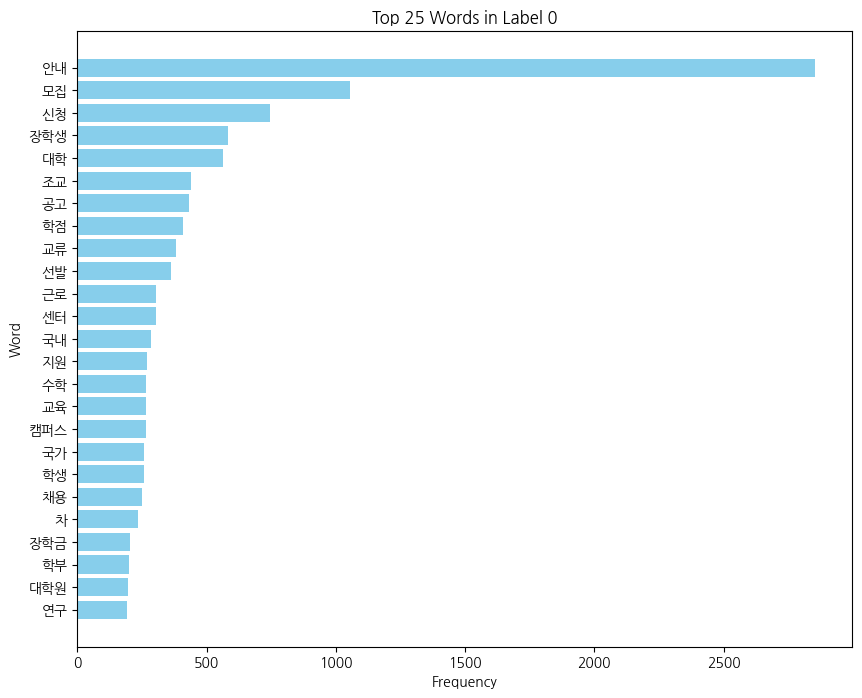

In [38]:
# 레이블 0에서 상위 25개 단어 빈도 시각화
plot_horizontal_bar(top_25_label_0_df, 'Top 25 Words in Label 0', 'skyblue')

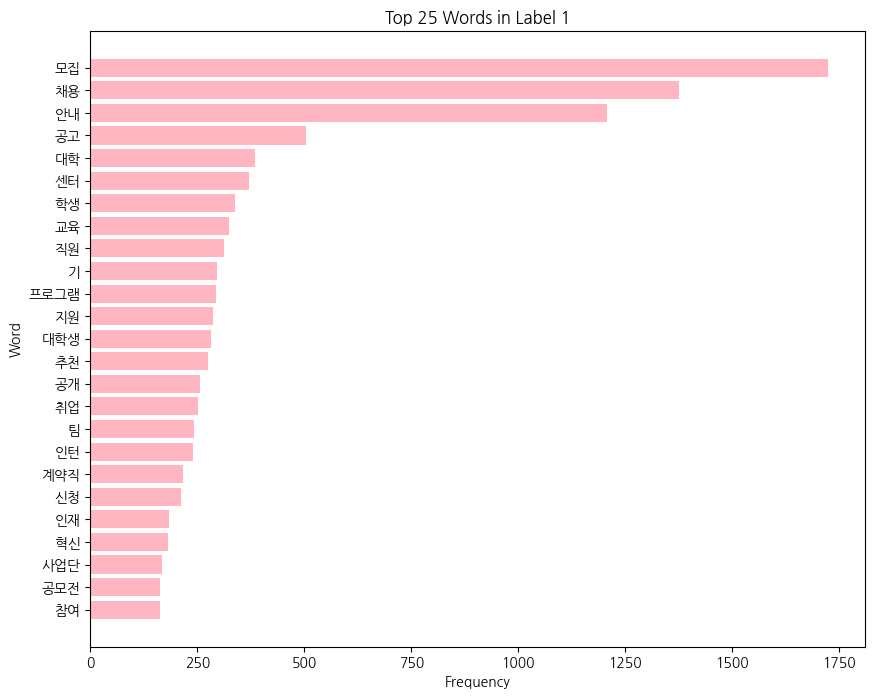

In [39]:
# 레이블 1에서 상위 25개 단어 빈도 시각화
plot_horizontal_bar(top_25_label_1_df, 'Top 25 Words in Label 1', 'lightpink')